In [107]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [2]:
# read in genuine users
human_df = pd.read_csv('./data/genuine_accounts.csv/users.csv')
human_df.set_index('id')

,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,...,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2
id,,,,,,,,,,,,,,,,,,,,,
1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,NaN,ja,NaN,...,NaN,15years ago X.Lines24,NaN,NaN,Tue Jun 11 11:20:35 +0000 2013,2013-06-11 13:20:35,2015-05-02 06:41:46,2016-03-15 15:53:47,0,0
2492782375,ro_or,1120Roll,2660,330,485,3972,5,NaN,ja,Tokyo,...,NaN,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),NaN,NaN,Tue May 13 10:37:57 +0000 2014,2014-05-13 12:37:57,2015-05-01 17:20:27,2016-03-15 15:53:48,0,0
293212315,bearclaw,14KBBrown,1254,166,177,1185,0,NaN,en,Eastern Time (US & Canada),...,NaN,Let me see what your best move is!,NaN,NaN,Wed May 04 23:30:37 +0000 2011,2011-05-05 01:30:37,2015-05-01 18:48:28,2016-03-15 15:53:48,0,0
191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,Greenland,...,NaN,20. menna: #farida #nyc and the 80s actually y...,NaN,NaN,Fri Sep 17 14:02:10 +0000 2010,2010-09-17 16:02:10,2015-05-01 13:55:16,2016-03-15 15:53:48,0,0
3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,NaN,en,NaN,...,NaN,Cosmetologist,NaN,NaN,Fri Feb 06 04:10:49 +0000 2015,2015-02-06 05:10:49,2015-05-02 01:17:32,2016-03-15 15:53:48,0,0
2157382005,JO,19_Joanne_87,12915,641,1066,1568,7,NaN,en,Central Time (US & Canada),...,NaN,CHRISTIAN -Communication degree -graphic desig...,NaN,NaN,Mon Oct 28 16:08:18 +0000 2013,2013-10-28 17:08:18,2015-05-01 13:46:12,2016-03-15 15:53:49,0,0
1947320929,❄McKayla❄,1Dniallprincess,13676,1042,2000,19012,7,NaN,en,NaN,...,NaN,"Live, Young, Wild and Free #crazymofo",NaN,NaN,Tue Oct 08 15:59:30 +0000 2013,2013-10-08 17:59:30,2015-05-01 13:35:33,2016-03-15 15:53:49,0,0
255846106,Giselle,1GisellePizarro,61294,561,118,590,4,https://t.co/v4qQQ0XDjd,es,Santiago,...,NaN,Hey what's up guys? This is Giselle. I'm 21. C...,NaN,NaN,Tue Feb 22 04:37:34 +0000 2011,2011-02-22 05:37:34,2015-05-01 16:46:13,2016-03-15 15:53:49,0,0
1733095801,Nicole Romany,1Nicoleromany,4854,337,256,1407,4,NaN,en,NaN,...,NaN,NaN,NaN,NaN,Thu Sep 05 20:52:02 +0000 2013,2013-09-05 22:52:02,2015-05-01 13:16:34,2016-03-15 15:53:50,0,0


In [3]:
# read in bots
bot_df = pd.read_csv('./data/social_spambots_1.csv/users.csv')
bot_df.append(pd.read_csv('./data/social_spambots_2.csv/users.csv'))
bot_df.append(pd.read_csv('./data/social_spambots_3.csv/users.csv'))

bot_df.set_index('id')

,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,...,verified,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1
id,,,,,,,,,,,,,,,,,,,,,
24858289,Davide Bertoli,davideb66,1299,22,40,1,0,NaN,it,Rome,...,NaN,NaN,NaN,NaN,NaN,Tue Mar 17 08:51:12 +0000 2009,2009-03-17 09:51:12,2014-04-19 14:46:19,2016-03-15 14:12:22,1
33212890,Elisa D'Ospina,ElisaDospina,18665,12561,3442,16358,110,http://t.co/ceK8TovxwI,it,Greenland,...,NaN,NaN,Autrice del libro #unavitatuttacurve dal 9 apr...,NaN,NaN,Sun Apr 19 14:38:04 +0000 2009,2009-04-19 16:38:04,2014-05-18 23:20:58,2016-03-15 14:17:13,1
39773427,Donato Vincenzo,Vladimir65,22987,600,755,14,6,NaN,it,Rome,...,NaN,NaN,[Live Long and Prosper],NaN,NaN,Wed May 13 15:34:41 +0000 2009,2009-05-13 17:34:41,2014-05-13 23:21:54,2016-03-15 14:16:44,1
57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,NaN,en,Pacific Time (US & Canada),...,NaN,NaN,"Cuasi Odontologa*♥,#Bipolar, #Sarcastica & Som...",NaN,NaN,Wed Jul 15 12:55:03 +0000 2009,2009-07-15 14:55:03,2014-05-19 23:24:18,2016-03-15 14:18:54,1
63258466,§ h a † u r♄,FabrizioC_c,20218,413,405,162,8,http://t.co/PK5F0JDKcy,it,Rome,...,NaN,NaN,"I shall rise from my own death, to avenge hers...",NaN,NaN,Wed Aug 05 21:12:49 +0000 2009,2009-08-05 23:12:49,2014-05-11 23:22:23,2016-03-15 14:17:05,1
96435556,Mariano,Marianocrt,15259,134,401,55,1,NaN,it,Rome,...,NaN,NaN,O scrivi Italia o scrivi libertà. Due termini ...,NaN,NaN,Sat Dec 12 22:53:04 +0000 2009,2009-12-12 23:53:04,2014-04-22 23:20:09,2016-03-15 14:12:14,1
108992875,marzia menonna,marzia_hayley,9551,337,630,655,1,http://t.co/JkUrqi0S0F,it,NaN,...,NaN,NaN,paramore 10/06/13 ♥♥ - Tonight Alive - TVD -TO...,NaN,NaN,Wed Jan 27 16:51:00 +0000 2010,2010-01-27 17:51:00,2014-06-07 23:23:32,2016-03-15 14:21:24,1
177671726,Roberto Boscaini,RobertoBoscaini,206,28,105,38,0,NaN,it,Rome,...,NaN,NaN,"Appassionato di manga, anime, cimema, serie tv...",NaN,NaN,Thu Aug 12 19:31:28 +0000 2010,2010-08-12 21:31:28,2014-05-20 23:24:27,2016-03-15 14:19:06,1
223945761,Ilsaggiolibro.it,ilsaggiolibro,93793,2617,52,0,28,http://t.co/vze3v7KAp7,it,Rome,...,NaN,NaN,NaN,NaN,NaN,Tue Dec 07 19:08:04 +0000 2010,2010-12-07 20:08:04,2014-05-27 23:22:16,2016-03-15 14:16:24,1


In [4]:
# create classification dataframe
human_df['bot'] = 0;
bot_df['bot'] = 1;

classified = human_df.append(bot_df)

In [39]:
stat_mean = classified.groupby('bot').median().to_dict()
stat_std = classified.groupby('bot').std().to_dict()

# we only want favourites_count, followers_count, friends_count, listed_count, statuses_count
stat_mean = {k: stat_mean[k] for k in ('favourites_count', 'followers_count', 'friends_count', 'listed_count', 'statuses_count')}
stat_std = {k: stat_std[k] for k in ('favourites_count', 'followers_count', 'friends_count', 'listed_count', 'statuses_count')}

human_stat_mean = [stat_mean[k][0] for k in stat_mean]
bot_stat_mean = [stat_mean[k][1] for k in stat_mean]

human_stat_std = [stat_std[k][0] for k in stat_std]
bot_stat_std = [stat_std[k][1] for k in stat_std]

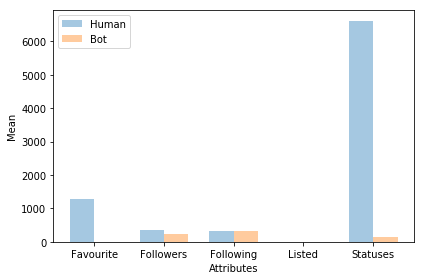

In [40]:
fig, ax = plt.subplots()
index = np.arange(len(stat_mean))
bar_width = 0.35
opacity = 0.4

rect1 = plt.bar(index, human_stat_mean, bar_width, alpha=opacity, label='Human')
rect2 = plt.bar(index + bar_width, bot_stat_mean, bar_width, alpha=opacity, label='Bot')
plt.xticks(index + bar_width / 2, ('Favourite', 'Followers', 'Following', 'Listed', 'Statuses'))

plt.xlabel('Attributes')
plt.ylabel('Mean')
plt.legend()

plt.tight_layout()
plt.show()

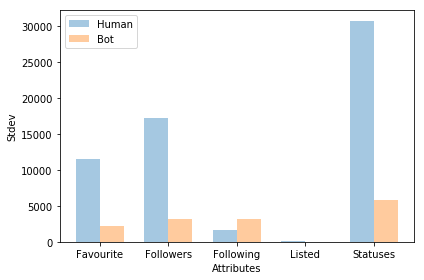

In [92]:
fig, ax = plt.subplots()
index = np.arange(len(stat_mean))

rect1 = plt.bar(index, human_stat_std, bar_width, alpha=opacity, label='Human')
rect2 = plt.bar(index + bar_width, bot_stat_std, bar_width, alpha=opacity, label='Bot')
plt.xticks(index + bar_width / 2, ('Favourite', 'Followers', 'Following', 'Listed', 'Statuses'))

plt.xlabel('Attributes')
plt.ylabel('Stdev')
plt.legend()

plt.tight_layout()
plt.show()

In [106]:
bot_l = bot_df[['favourites_count', 'followers_count', 'friends_count', 'listed_count', 'statuses_count', 'bot']].values.tolist()
human_l = human_df[['favourites_count', 'followers_count', 'friends_count', 'listed_count', 'statuses_count', 'bot']].values.tolist()

X = np.array(bot_l + human_l)
np.random.shuffle(X)

Y = X[:,-1]
X = np.delete(X, [5], axis=1)

train_x = X[0:3348]
train_y = Y[0:3348]

test_x = X[3349 : 4465]
test_y = Y[3349 : 4465]

array([[    3,  4214,  4343,     7,  6313],
       [26009,   912,   996,    55, 45786],
       [32866,   858,   388,     4, 34600],
       ..., 
       [    0,   379,   483,     0,   126],
       [  182,   110,   106,     0,  1349],
       [  827,  1867,   456,    24,  8147]])

In [108]:
g_clf = GaussianNB()
g_clf.fit(train_x, train_y)

GaussianNB(priors=None)

In [111]:
g_clf.score(test_x, test_y)

0.510752688172043